<a id='start'></a>
# Clusterizzazione e Classificazione

In questo notebook vengono presentati degli esercizi sui Decision Tree.

Provate a svolgere il seguente esercizio:<br>
1) [Cluster e elbow method](#section1)<br>
2) [Segmentazione delle specie](#section2)<br>
3) [Crime in Chicago](#section3)<br>

<a id='section1'></a>
## Cluster e elbow method

Proviamo a predere un dataset con tutti i paesi e la loro latitudine e longitudine e a effettuarne una clusterizzazione:

In [1]:
import pandas as pd
data = pd.read_csv('data/Countries-exercise.csv')
data.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


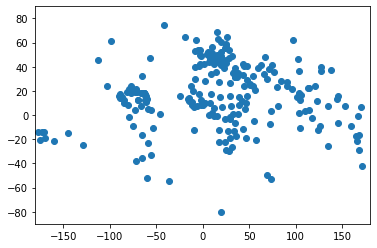

In [3]:
import matplotlib.pyplot as plt

plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

Le inerzie sono state [1413859.6798344273, 657012.0797586325, 325235.52237055893, 256680.9481148032, 192212.4818949704, 151410.08098853042]


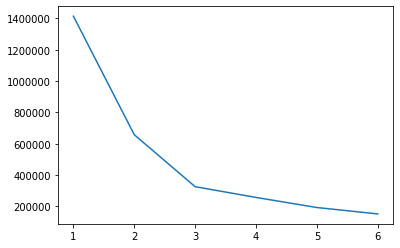

In [14]:
wcss = []
nums = [1, 2, 3, 4, 5, 6]

for k in nums:
    kmeans = KMeans(k)
    kmeans.fit(data[['Longitude', 'Latitude']])
    wcss.append(kmeans.inertia_)
    
print ("Le inerzie sono state %s" % wcss)
plt.plot(nums, wcss)
plt.show()

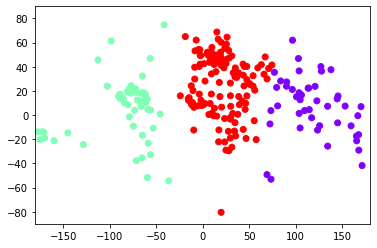

In [18]:
from sklearn.cluster import KMeans

model = KMeans(3)
model.fit(data[['Longitude', 'Latitude']])

clusters = model.predict(data[['Longitude', 'Latitude']])

plt.scatter(data['Longitude'], data['Latitude'], c=clusters, cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

<a id='section2'></a>
## Segmentazione delle specie

Per questo esercizio utilizzeremo l'Iris flower dataset, che è uno dei dataset più popolari per gli esercizi di machine learning. Puoi leggere molte informazioni a riguardo a questo link: https://en.wikipedia.org/wiki/Iris_flower_data_set

In questo dataset ci sono 4 feature: sepal length, sepal width, petal length, and petal width.

Prova a disegnare i dati con 2, 3 e 5 cluster. Cosa osservi?

Prova a identificare il numero ottimale di cluster e poi calcolalo col metodo elbow.

In [19]:
data = pd.read_csv('data/iris-dataset.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


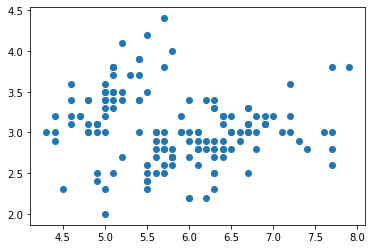

In [20]:
plt.scatter(data['sepal_length'], data['sepal_width'])

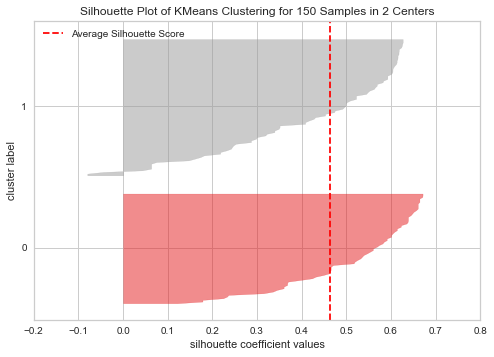

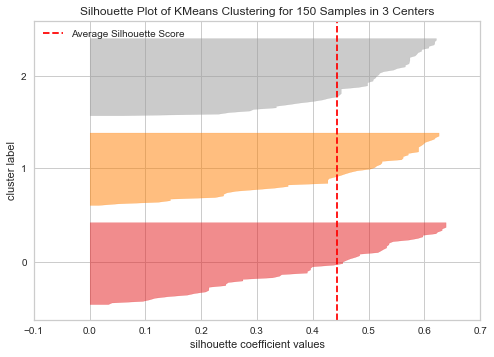

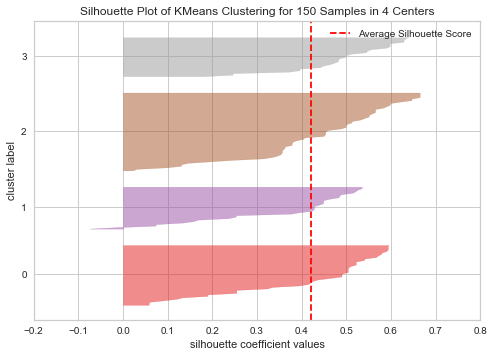

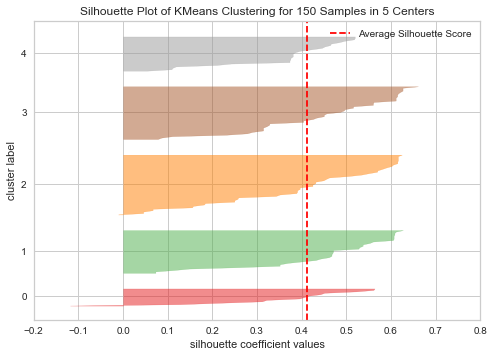

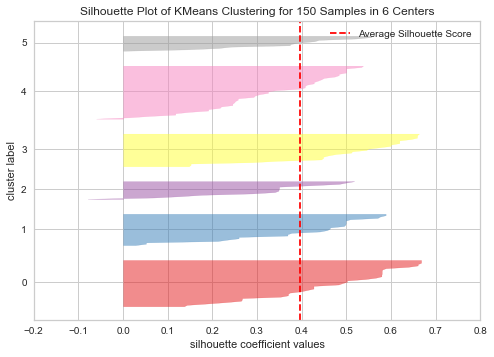

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer

range_cluster = [2, 3, 4, 5, 6]
for n in range_cluster:
    model = KMeans(n)
    graph = SilhouetteVisualizer(model)
    graph.fit(data[['sepal_length', 'sepal_width']])
    graph.show()

<a id='section3'></a>
## Crime in Chicago

Leggiamo i dati dei crimini accaduti a Chicago con le coordinate di latitudine e longitudine e vediamo come è possibile raggrupparli in diverse categorie in base alla posizione dove i crimini sono avvenuti.

In [24]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.cluster import KMeans

In [25]:
df = pd.read_csv('data/Crimes_-_2001_to_present.csv', header = 0)
#Ripuliamo i dati eliminando i dati N/A e formattando i campi data
df = df.dropna(axis=0)
df.Date = pd.to_datetime(df.Date, errors='coerce')
df['Updated On'] = pd.to_datetime(df['Updated On'], errors='coerce')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10002677,HY191890,2015-03-20 13:13:00,020XX W 70TH ST,1661,GAMBLING,GAME/DICE,STREET,True,False,...,17.0,67.0,19,1164027.0,1858234.0,2015,2018-02-10 15:50:01,41.766615,-87.674337,"(41.766615006, -87.674337321)"
1,10003802,HY193541,2015-03-21 18:45:00,042XX W MONROE ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,26.0,19,1148136.0,1899324.0,2015,2018-02-10 15:50:01,41.879691,-87.731530,"(41.879691121, -87.731529667)"
2,10003937,HY193663,2015-03-21 19:55:00,032XX W LAWRENCE AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,SMALL RETAIL STORE,True,False,...,39.0,14.0,19,1154071.0,1931710.0,2015,2018-02-10 15:50:01,41.968445,-87.708871,"(41.968444682, -87.708871059)"
3,10004429,HY194332,2015-03-22 13:57:00,019XX S ST LOUIS AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,24.0,29.0,19,1153407.0,1890195.0,2015,2018-02-10 15:50:01,41.854537,-87.712418,"(41.854537081, -87.71241763)"
4,10005837,HY195964,2015-03-23 20:40:00,039XX W CERMAK RD,1661,GAMBLING,GAME/DICE,PARKING LOT/GARAGE(NON.RESID.),True,False,...,24.0,29.0,19,1150290.0,1889088.0,2015,2018-02-10 15:50:01,41.851561,-87.723887,"(41.851560618, -87.723887245)"


Effettuiamo il metodo elbow sulle location (Longitude e Latitude) dei dati nel dataset:

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>